## Zadanie 6 - Autoencoder

Epoch 1/50
25/25 [==============================] - 1s 9ms/step - loss: 0.0850 - val_loss: 0.0805
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.0834 - val_loss: 0.0792
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0821 - val_loss: 0.0780
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0809 - val_loss: 0.0768
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0796 - val_loss: 0.0756
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0783 - val_loss: 0.0742
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0768 - val_loss: 0.0727
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0752 - val_loss: 0.0710
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0734 - val_loss: 0.0693
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.0715 - val_loss: 0.0675
Epoch 11/50
25/25 [

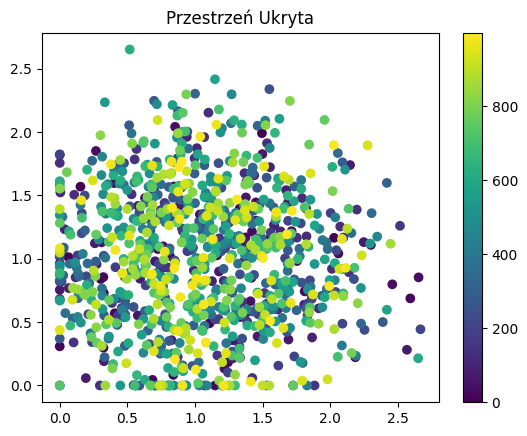

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Przykładowe dane
data = np.random.rand(1000, 10)  # 1000 przykładów o 10 cechach

# Rozdzielenie danych na zestaw treningowy i testowy
split_index = int(0.8 * len(data))
train_data = data[:split_index]
test_data = data[split_index:]

# Architektura autoenkodera
input_layer = Input(shape=(10,))

# Koder
encoded = Dense(5, activation='relu')(input_layer)

# Dekoder
decoded = Dense(10, activation='sigmoid')(encoded)

# Model autoenkodera
autoencoder = Model(input_layer, decoded)

# Model koderu
encoder = Model(input_layer, encoded)

# Kompilacja modelu
autoencoder.compile(optimizer='adam', loss='mse')

# Trenowanie autoenkodera
autoencoder.fit(train_data, train_data, epochs=50, batch_size=32, validation_data=(test_data, test_data))

# Wizualizacja przestrzeni ukrytej
encoded_data = encoder.predict(data)

# Wizualizacja grup punktów w przestrzeni ukrytej
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=np.arange(len(data)), cmap='viridis')
plt.colorbar()
plt.title('Przestrzeń Ukryta')
plt.show()
